In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

%matplotlib inline

In [90]:
xytick_font = 18
xylabel_font = 24
legend_font = 16
figsize = (9, 3.5)

input_plot_file = (
    "/home/lei/rajrup/KinectStream/data/user_study/user_study_01_27_2025.csv"
)
out_plots_dir = "/home/lei/rajrup/KinectStream/Scripts/user_study/plots/"

In [91]:
colors = [
    (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
    (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
    (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
    (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
]

In [92]:
data = pd.read_csv(input_plot_file)
data

,Video Sequence,Trace Name,Participant ID,A (Draco),B (Livo_nocull),C (Livo),D (MeshReduce)
0,pizza1,tracep1,1,2.50,3.00,5.00,4.0
1,dance5,tracep1,1,2.80,4.50,5.00,3.8
2,band2,wifi25,1,2.40,3.50,4.30,3.6
3,band2,tracep1,2,2.00,4.10,4.90,3.5
4,toddler4,tracep1,2,1.70,4.20,4.60,3.8
5,pizza1,wifi25,2,3.00,4.50,4.40,2.9
6,toddler4,wifi25,3,1.00,4.00,5.00,3.0
7,office1,tracep1,3,1.00,3.00,5.00,1.0
8,dance5,wifi25,3,1.00,3.00,4.00,2.0
9,office1,wifi25,4,2.00,3.00,4.00,2.0


In [93]:
mean_draco, mean_livo_nocull, mean_livo, mean_meshreduce = (
    data["A (Draco)"].mean(),
    data["B (Livo_nocull)"].mean(),
    data["C (Livo)"].mean(),
    data["D (MeshReduce)"].mean(),
)
median_draco, median_livo_nocull, median_livo, median_meshreduce = (
    data["A (Draco)"].median(),
    data["B (Livo_nocull)"].median(),
    data["C (Livo)"].median(),
    data["D (MeshReduce)"].median(),
)
print(
    f"Mean Draco = {mean_draco}, Mean Livo_nocull = {mean_livo_nocull}, Mean Livo = {mean_livo}",
    f"Mean MeshReduce = {mean_meshreduce}",
)
print(
    f"Median Draco = {median_draco}, Median Livo_nocull = {median_livo_nocull}, Median Livo = {median_livo}",
    f"Median MeshReduce = {median_meshreduce}",
)

Mean Draco = 1.5456140350877194, Mean Livo_nocull = 3.3710526315789475, Mean Livo = 4.1114035087719305 Mean MeshReduce = 2.4807017543859655
Median Draco = 1.0, Median Livo_nocull = 3.5, Median Livo = 4.0 Median MeshReduce = 2.3


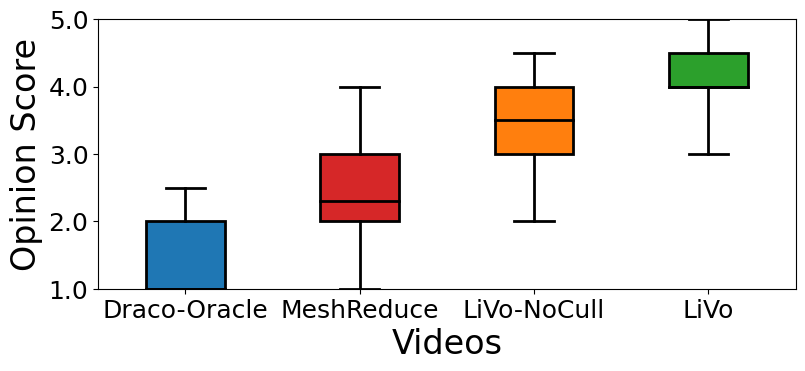

In [94]:
labels = ["A (Draco)", "B (Livo_nocull)", "C (Livo)", "D (MeshReduce)"]
y_data = [
    data["A (Draco)"],
    data["B (Livo_nocull)"],
    data["C (Livo)"],
    data["D (MeshReduce)"],
]

boxes = [
    {
        "label": "Draco",
        "mean": data["A (Draco)"].mean(),
        "med": data["A (Draco)"].median(),
        "q1": data["A (Draco)"].quantile(0.25),
        "q3": data["A (Draco)"].quantile(0.75),
        "whislo": data["A (Draco)"].quantile(0.1),
        "whishi": data["A (Draco)"].quantile(0.9),
        "fliers": [],
    },
    {
        "label": "MeshReduce",
        "mean": data["D (MeshReduce)"].mean(),
        "med": data["D (MeshReduce)"].median(),
        "q1": data["D (MeshReduce)"].quantile(0.25),
        "q3": data["D (MeshReduce)"].quantile(0.75),
        "whislo": data["D (MeshReduce)"].quantile(0.1),
        "whishi": data["D (MeshReduce)"].quantile(0.9),
        "fliers": [],
    },
    {
        "label": "LiVo-NoCull",
        "mean": data["B (Livo_nocull)"].mean(),
        "med": data["B (Livo_nocull)"].median(),
        "q1": data["B (Livo_nocull)"].quantile(0.25),
        "q3": data["B (Livo_nocull)"].quantile(0.75),
        "whislo": data["B (Livo_nocull)"].quantile(0.1),
        "whishi": data["B (Livo_nocull)"].quantile(0.9),
        "fliers": [],
    },
    {
        "label": "LiVo",
        "mean": data["C (Livo)"].mean(),
        "med": data["C (Livo)"].median(),
        "q1": data["C (Livo)"].quantile(0.25),
        "q3": data["C (Livo)"].quantile(0.75),
        "whislo": data["C (Livo)"].quantile(0.1),
        "whishi": data["C (Livo)"].quantile(0.9),
        "fliers": [],
    },
]

fig, ax = plt.subplots(figsize=figsize)
boxes_ = ax.bxp(boxes, patch_artist=True)

for k, v in boxes_.items():
    plt.setp(boxes_.get(k), color="k", linewidth=2)

for box, color in zip(boxes_["boxes"], colors):
    box.set(facecolor=color)

ax.set_ylabel("Opinion Score", fontsize=xylabel_font)
ax.set_xlabel("Videos", fontsize=xylabel_font)
ax.set_ylim(1, 5.0)

ax.set_ylabel("Opinion Score", fontsize=xylabel_font)
ax.set_xlabel("Videos", fontsize=xylabel_font)
# ax.set_ylim(0, 5.2)
ax.set_yticks(np.arange(1, 5.1, 1))
ax.set_yticklabels(np.arange(1, 5.1, 1), fontsize=xytick_font)
ax.set_xticklabels(
    ["Draco-Oracle", "MeshReduce", "LiVo-NoCull", "LiVo"], fontsize=xytick_font
)

# Create legend rectangle patches
draco_patch = mpatches.Patch(color=colors[0], label="Draco")
meshreduce_patch = mpatches.Patch(color=colors[1], label="MeshReduce")
livo_nocull_patch = mpatches.Patch(color=colors[2], label="LiVo-NoCull")
livo_patch = mpatches.Patch(color=colors[3], label="LiVo")

# Add legend with rectangle patches
# plt.legend(handles=[draco_patch, livo_nocull_patch, livo_patch], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.019), fontsize=14)
plt.show()

# Save figure to pdf
fig.savefig(
    os.path.join(out_plots_dir, "user_study_across_methods.pdf"),
    bbox_inches="tight",
)

In [95]:
import json

print(json.dumps(boxes, indent=4))

[
    {
        "label": "Draco",
        "mean": 1.5456140350877194,
        "med": 1.0,
        "q1": 1.0,
        "q3": 2.0,
        "whislo": 1.0,
        "whishi": 2.5,
        "fliers": []
    },
    {
        "label": "MeshReduce",
        "mean": 2.4807017543859655,
        "med": 2.3,
        "q1": 2.0,
        "q3": 3.0,
        "whislo": 1.0,
        "whishi": 4.0,
        "fliers": []
    },
    {
        "label": "LiVo-NoCull",
        "mean": 3.3710526315789475,
        "med": 3.5,
        "q1": 3.0,
        "q3": 4.0,
        "whislo": 2.0,
        "whishi": 4.5,
        "fliers": []
    },
    {
        "label": "LiVo",
        "mean": 4.1114035087719305,
        "med": 4.0,
        "q1": 4.0,
        "q3": 4.5,
        "whislo": 3.0,
        "whishi": 5.0,
        "fliers": []
    }
]


In [96]:
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color="k", linewidth=2)

    for box in plot_name["boxes"]:
        box.set(facecolor=color_code)

    # # use plot function to draw a small line to name the legend.
    # plt.plot([], c=color_code, label=label)
    # plt.legend(loc='upper center',ncol=3, bbox_to_anchor=(0.5, 1.019), fontsize=14)

In [97]:
def create_box(data, label):
    dict_ = {
        "label": label,
        "mean": data.mean(),
        "med": data.median(),
        "q1": data.quantile(0.25),
        "q3": data.quantile(0.75),
        "whislo": data.quantile(0.1),
        "whishi": data.quantile(0.9),
        "fliers": [],
    }
    return dict_

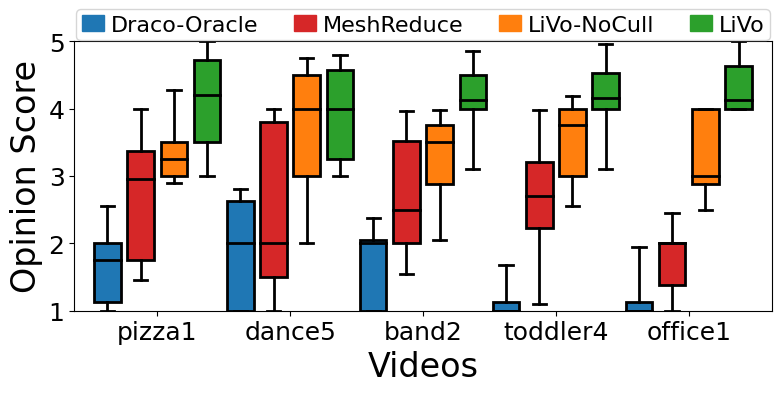

In [98]:
labels = list(data["Video Sequence"].unique())

# # change to lower case
labels_lower = [label.lower() for label in labels]

draco_data = [data[data["Video Sequence"] == label]["A (Draco)"] for label in labels]
meshreduce_data = [
    data[data["Video Sequence"] == label]["D (MeshReduce)"] for label in labels
]
livo_nocull_data = [
    data[data["Video Sequence"] == label]["B (Livo_nocull)"] for label in labels
]
livo_data = [data[data["Video Sequence"] == label]["C (Livo)"] for label in labels]

draco_box = [create_box(data, "Draco") for data in draco_data]
meshreduce_box = [create_box(data, "MeshReduce") for data in meshreduce_data]
livo_nocull_box = [create_box(data, "LiVo-NoCull") for data in livo_nocull_data]
livo_box = [create_box(data, "LiVo") for data in livo_data]

fig, ax = plt.subplots(1, 1, figsize=figsize)
draco_plot = ax.bxp(
    draco_box,
    positions=np.array(np.arange(len(draco_data))) * 2.0 - 0.75,
    widths=0.4,
    patch_artist=True,
)

meshreduce_plot = ax.bxp(
    meshreduce_box,
    positions=np.array(np.arange(len(meshreduce_data))) * 2.0 - 0.25,
    widths=0.4,
    patch_artist=True,
)

livo_nocull_plot = ax.bxp(
    livo_nocull_box,
    positions=np.array(np.arange(len(livo_nocull_data))) * 2.0 + 0.25,
    widths=0.4,
    patch_artist=True,
)

livo_plot = ax.bxp(
    livo_box,
    positions=np.array(np.arange(len(livo_data))) * 2.0 + 0.75,
    widths=0.4,
    patch_artist=True,
)

# fig, ax = plt.subplots(figsize=(10, 6))
# draco_plot = ax.boxplot(draco_data, positions=np.array(np.arange(len(draco_data)))*2.0-0.5, widths=0.4, showfliers=False)
# livo_nocull_plot = plt.boxplot(livo_nocull_data, positions=np.array(np.arange(len(livo_nocull_data)))*2.0, widths=0.4, showfliers=False)
# livo_plot = plt.boxplot(livo_data, positions=np.array(np.arange(len(livo_data)))*2.0+0.5, widths=0.4, showfliers=False)

define_box_properties(draco_plot, colors[0], "Draco-Oracle")
define_box_properties(meshreduce_plot, colors[1], "MeshReduce")
define_box_properties(livo_nocull_plot, colors[2], "LiVo-NoCull")
define_box_properties(livo_plot, colors[3], "LiVo")

ax.set_xticks(np.arange(0, len(labels) * 2, 2), labels_lower)

ax.set_ylabel("Opinion Score", fontsize=xylabel_font)
ax.set_xlabel("Videos", fontsize=xylabel_font)
ax.set_ylim(1, 5.0)
ax.set_yticks(np.arange(1, 6, 1))
ax.set_yticklabels(np.arange(1, 6, 1), fontsize=xytick_font)
ax.set_xticklabels(labels_lower, fontsize=xytick_font)

# Create legend rectangle patches
draco_patch = mpatches.Patch(color=colors[0], label="Draco-Oracle")
meshreduce_patch = mpatches.Patch(color=colors[1], label="MeshReduce")
livo_nocull_patch = mpatches.Patch(color=colors[2], label="LiVo-NoCull")
livo_patch = mpatches.Patch(color=colors[3], label="LiVo")

# Add legend with rectangle patches
legend = plt.legend(
    handles=[draco_patch, meshreduce_patch, livo_nocull_patch, livo_patch],
    handlelength=1,
    handletextpad=0.3,
    columnspacing=1.6,
    loc="upper center",
    ncol=4,
    bbox_to_anchor=(0.5, 1.16),
    fontsize=legend_font,
    borderpad=0.25,
)

plt.show()

fig.savefig(
    os.path.join(out_plots_dir, "user_study_across_videos.pdf"),
    bbox_inches="tight",
)

In [99]:
# print(json.dumps(meshreduce_box, indent=4))
# print(json.dumps(livo_nocull_box, indent=4))
print(json.dumps(livo_box, indent=4))

[
    {
        "label": "LiVo",
        "mean": 4.069999999999999,
        "med": 4.2,
        "q1": 3.5,
        "q3": 4.725,
        "whislo": 3.0,
        "whishi": 5.0,
        "fliers": []
    },
    {
        "label": "LiVo",
        "mean": 3.995454545454545,
        "med": 4.0,
        "q1": 3.25,
        "q3": 4.575,
        "whislo": 3.0,
        "whishi": 4.8,
        "fliers": []
    },
    {
        "label": "LiVo",
        "mean": 4.0375000000000005,
        "med": 4.125,
        "q1": 4.0,
        "q3": 4.5,
        "whislo": 3.1,
        "whishi": 4.86,
        "fliers": []
    },
    {
        "label": "LiVo",
        "mean": 4.125000000000001,
        "med": 4.15,
        "q1": 4.0,
        "q3": 4.525,
        "whislo": 3.1,
        "whishi": 4.96,
        "fliers": []
    },
    {
        "label": "LiVo",
        "mean": 4.3125,
        "med": 4.125,
        "q1": 4.0,
        "q3": 4.625,
        "whislo": 4.0,
        "whishi": 5.0,
        "fliers": []
    }
]


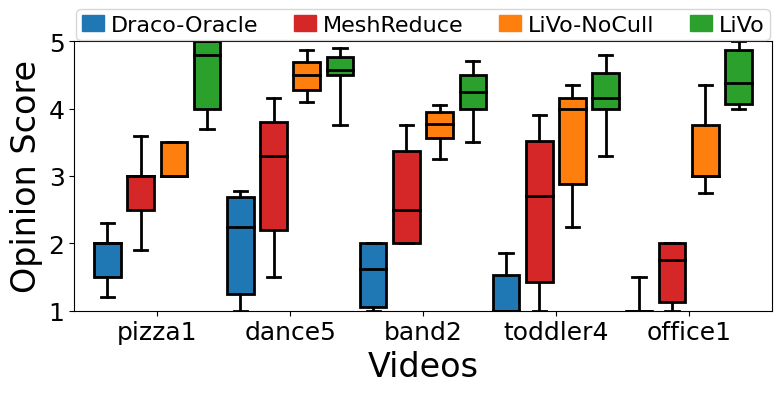

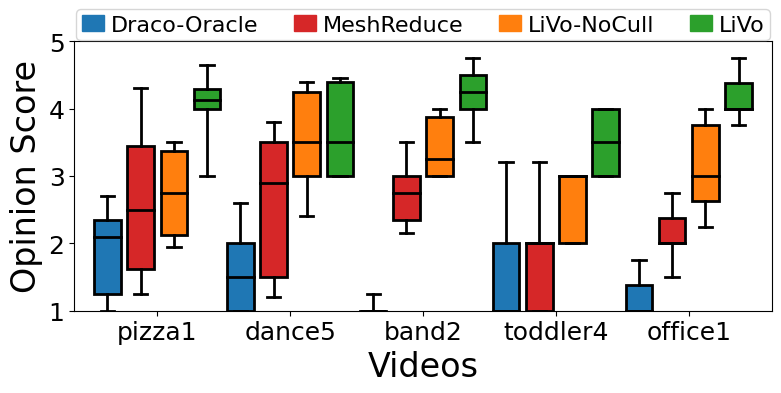

In [100]:
data = pd.read_csv(input_plot_file)


############ TRACEP1 ############
data_tracep1 = data[data["Trace Name"] == "tracep1"]
labels = list(data_tracep1["Video Sequence"].unique())

draco_data_tracep1 = [
    data_tracep1[data_tracep1["Video Sequence"] == label]["A (Draco)"]
    for label in labels
]

meshreduce_data_tracep1 = [
    data_tracep1[data_tracep1["Video Sequence"] == label]["D (MeshReduce)"]
    for label in labels
]

livo_nocull_data_tracep1 = [
    data_tracep1[data_tracep1["Video Sequence"] == label]["B (Livo_nocull)"]
    for label in labels
]
livo_data_tracep1 = [
    data_tracep1[data_tracep1["Video Sequence"] == label]["C (Livo)"]
    for label in labels
]

draco_tracep1_box = [create_box(data, "Draco") for data in draco_data_tracep1]
meshreduce_tracep1_box = [
    create_box(data, "MeshReduce") for data in meshreduce_data_tracep1
]
livo_nocull_tracep1_box = [
    create_box(data, "LiVo-NoCull") for data in livo_nocull_data_tracep1
]
livo_tracep1_box = [create_box(data, "LiVo") for data in livo_data_tracep1]

fig, ax1 = plt.subplots(1, 1, figsize=figsize)
draco_plot1 = ax1.bxp(
    draco_tracep1_box,
    positions=np.array(np.arange(len(draco_data_tracep1))) * 2.0 - 0.75,
    widths=0.4,
    patch_artist=True,
)
meshreduce_plot1 = ax1.bxp(
    meshreduce_tracep1_box,
    positions=np.array(np.arange(len(meshreduce_data_tracep1))) * 2.0 - 0.25,
    widths=0.4,
    patch_artist=True,
)

livo_nocull_plot1 = ax1.bxp(
    livo_nocull_tracep1_box,
    positions=np.array(np.arange(len(livo_nocull_data_tracep1))) * 2.0 + 0.25,
    widths=0.4,
    patch_artist=True,
)
livo_plot1 = ax1.bxp(
    livo_tracep1_box,
    positions=np.array(np.arange(len(livo_data_tracep1))) * 2.0 + 0.75,
    widths=0.4,
    patch_artist=True,
)

# fig, ax1 = plt.subplots(figsize=(8, 5))
# draco_plot1 = ax1.boxplot(draco_data_tracep1, positions=np.array(np.arange(len(draco_data_tracep1)))*2.0-0.5, widths=0.4, showfliers=False)
# livo_nocull_plot1 = ax1.boxplot(livo_nocull_data_tracep1, positions=np.array(np.arange(len(livo_nocull_data_tracep1)))*2.0, widths=0.4, showfliers=False)
# livo_plot1 = ax1.boxplot(livo_data_tracep1, positions=np.array(np.arange(len(livo_data_tracep1)))*2.0+0.5, widths=0.4, showfliers=False)

define_box_properties(draco_plot1, colors[0], "Draco-Oracle")
define_box_properties(meshreduce_plot1, colors[1], "MeshReduce")
define_box_properties(livo_nocull_plot1, colors[2], "LiVo-NoCull")
define_box_properties(livo_plot1, colors[3], "LiVo")

ax1.set_xticks(np.arange(0, len(labels) * 2, 2), labels_lower)

ax1.set_ylabel("Opinion Score", fontsize=xylabel_font)
ax1.set_xlabel("Videos", fontsize=xylabel_font)
ax1.set_ylim(1, 5.0)
ax1.set_yticks(np.arange(1, 6, 1))
ax1.set_yticklabels(np.arange(1, 6, 1), fontsize=xytick_font)
ax1.set_xticklabels(labels_lower, fontsize=xytick_font)

# Create legend rectangle patches
draco_patch = mpatches.Patch(color=colors[0], label="Draco-Oracle")
meshreduce_patch = mpatches.Patch(color=colors[1], label="MeshReduce")
livo_nocull_patch = mpatches.Patch(color=colors[2], label="LiVo-NoCull")
livo_patch = mpatches.Patch(color=colors[3], label="LiVo")

# Add legend with rectangle patches
legend = plt.legend(
    handles=[draco_patch, meshreduce_patch, livo_nocull_patch, livo_patch],
    handlelength=1,
    handletextpad=0.3,
    columnspacing=1.6,
    loc="upper center",
    ncol=4,
    bbox_to_anchor=(0.5, 1.16),
    fontsize=legend_font,
    borderpad=0.25,
)

plt.show()

fig.savefig(
    os.path.join(out_plots_dir, "user_study_across_videos_tracep1.pdf"),
    bbox_inches="tight",
)


############ WIFI-25 ############
data_wifi25 = data[data["Trace Name"] == "wifi25"]

labels = list(data_wifi25["Video Sequence"].unique())

draco_data_wifi25 = [
    data_wifi25[data_wifi25["Video Sequence"] == label]["A (Draco)"] for label in labels
]

meshreduce_data_wifi25 = [
    data_wifi25[data_wifi25["Video Sequence"] == label]["D (MeshReduce)"]
    for label in labels
]

livo_nocull_data_wifi25 = [
    data_wifi25[data_wifi25["Video Sequence"] == label]["B (Livo_nocull)"]
    for label in labels
]
livo_data_wifi25 = [
    data_wifi25[data_wifi25["Video Sequence"] == label]["C (Livo)"] for label in labels
]

draco_wifi25_box = [create_box(data, "Draco") for data in draco_data_wifi25]
meshreduce_wifi25_box = [
    create_box(data, "MeshReduce") for data in meshreduce_data_wifi25
]
livo_nocull_wifi25_box = [
    create_box(data, "LiVo-NoCull") for data in livo_nocull_data_wifi25
]
livo_wifi25_box = [create_box(data, "LiVo") for data in livo_data_wifi25]

fig, ax2 = plt.subplots(figsize=figsize)
draco_plot2 = ax2.bxp(
    draco_wifi25_box,
    positions=np.array(np.arange(len(draco_data_wifi25))) * 2.0 - 0.75,
    widths=0.4,
    patch_artist=True,
)

meshreduce_plot2 = ax2.bxp(
    meshreduce_wifi25_box,
    positions=np.array(np.arange(len(meshreduce_data_wifi25))) * 2.0 - 0.25,
    widths=0.4,
    patch_artist=True,
)

livo_nocull_plot2 = ax2.bxp(
    livo_nocull_wifi25_box,
    positions=np.array(np.arange(len(livo_nocull_data_wifi25))) * 2.0 + 0.25,
    widths=0.4,
    patch_artist=True,
)
livo_plot2 = ax2.bxp(
    livo_wifi25_box,
    positions=np.array(np.arange(len(livo_data_wifi25))) * 2.0 + 0.75,
    widths=0.4,
    patch_artist=True,
)

# fig, ax2 = plt.subplots(figsize=(8, 5))
# draco_plot2 = ax2.boxplot(draco_data_wifi25, positions=np.array(np.arange(len(draco_data_wifi25)))*2.0-0.5, widths=0.4, showfliers=False)
# livo_nocull_plot2 = ax2.boxplot(livo_nocull_data_wifi25, positions=np.array(np.arange(len(livo_nocull_data_wifi25)))*2.0, widths=0.4, showfliers=False)
# livo_plot2 = ax2.boxplot(livo_data_wifi25, positions=np.array(np.arange(len(livo_data_wifi25)))*2.0+0.5, widths=0.4, showfliers=False)

define_box_properties(draco_plot2, colors[0], "Draco-Oracle")
define_box_properties(meshreduce_plot2, colors[1], "MeshReduce")
define_box_properties(livo_nocull_plot2, colors[2], "LiVo-NoCull")
define_box_properties(livo_plot2, colors[3], "LiVo")

ax2.set_xticks(np.arange(0, len(labels) * 2, 2), labels_lower)

ax2.set_ylabel("Opinion Score", fontsize=xylabel_font)
ax2.set_xlabel("Videos", fontsize=xylabel_font)
ax2.set_ylim(1, 5.0)
ax2.set_yticks(np.arange(1, 6, 1))
ax2.set_yticklabels(np.arange(1, 6, 1), fontsize=xytick_font)
ax2.set_xticklabels(labels_lower, fontsize=xytick_font)

# Create legend rectangle patches
draco_patch = mpatches.Patch(color=colors[0], label="Draco-Oracle")
meshreduce_patch = mpatches.Patch(color=colors[1], label="MeshReduce")
livo_nocull_patch = mpatches.Patch(color=colors[2], label="LiVo-NoCull")
livo_patch = mpatches.Patch(color=colors[3], label="LiVo")

# Add legend with rectangle patches
legend = plt.legend(
    handles=[draco_patch, meshreduce_patch, livo_nocull_patch, livo_patch],
    handlelength=1,
    handletextpad=0.3,
    columnspacing=1.6,
    loc="upper center",
    ncol=4,
    bbox_to_anchor=(0.5, 1.16),
    fontsize=legend_font,
    borderpad=0.25,
)

plt.show()
fig.savefig(
    os.path.join(out_plots_dir, "user_study_across_videos_wifi25.pdf"),
    bbox_inches="tight",
)

In [110]:
# print(json.dumps(livo_tracep1_box, indent=4))
print(json.dumps(livo_wifi25_box, indent=4))

# Mean and Median for Tracep1
mos_list_tracep1 = [d["mean"] for d in livo_tracep1_box]
print(f"Mean MOS for Tracep1: {np.mean(mos_list_tracep1)}")

# Mean and Median for WiFi-25
mos_list_wifi25 = [d["mean"] for d in livo_wifi25_box]
print(f"Mean MOS for WiFi-25: {np.mean(mos_list_wifi25)}")

[
    {
        "label": "LiVo",
        "mean": 3.9250000000000003,
        "med": 4.125,
        "q1": 4.0,
        "q3": 4.2875,
        "whislo": 3.0,
        "whishi": 4.65,
        "fliers": []
    },
    {
        "label": "LiVo",
        "mean": 3.6799999999999997,
        "med": 3.5,
        "q1": 3.0,
        "q3": 4.4,
        "whislo": 3.0,
        "whishi": 4.46,
        "fliers": []
    },
    {
        "label": "LiVo",
        "mean": 4.166666666666667,
        "med": 4.25,
        "q1": 4.0,
        "q3": 4.5,
        "whislo": 3.5,
        "whishi": 4.75,
        "fliers": []
    },
    {
        "label": "LiVo",
        "mean": 3.5,
        "med": 3.5,
        "q1": 3.0,
        "q3": 4.0,
        "whislo": 3.0,
        "whishi": 4.0,
        "fliers": []
    },
    {
        "label": "LiVo",
        "mean": 4.166666666666667,
        "med": 4.0,
        "q1": 4.0,
        "q3": 4.375,
        "whislo": 3.75,
        "whishi": 4.75,
        "fliers": []
    }
]
Mean M

In [111]:
# print(json.dumps(livo_nocull_tracep1_box, indent=4))
print(json.dumps(livo_nocull_wifi25_box, indent=4))

[
    {
        "label": "LiVo-NoCull",
        "mean": 2.733333333333333,
        "med": 2.75,
        "q1": 2.125,
        "q3": 3.375,
        "whislo": 1.95,
        "whishi": 3.5,
        "fliers": []
    },
    {
        "label": "LiVo-NoCull",
        "mean": 3.45,
        "med": 3.5,
        "q1": 3.0,
        "q3": 4.25,
        "whislo": 2.4,
        "whishi": 4.4,
        "fliers": []
    },
    {
        "label": "LiVo-NoCull",
        "mean": 3.4166666666666665,
        "med": 3.25,
        "q1": 3.0,
        "q3": 3.875,
        "whislo": 3.0,
        "whishi": 4.0,
        "fliers": []
    },
    {
        "label": "LiVo-NoCull",
        "mean": 2.6,
        "med": 3.0,
        "q1": 2.0,
        "q3": 3.0,
        "whislo": 2.0,
        "whishi": 3.0,
        "fliers": []
    },
    {
        "label": "LiVo-NoCull",
        "mean": 3.0833333333333335,
        "med": 3.0,
        "q1": 2.625,
        "q3": 3.75,
        "whislo": 2.25,
        "whishi": 4.0,
        "fli

In [103]:
# print(json.dumps(meshreduce_tracep1_box, indent=4))
print(json.dumps(meshreduce_wifi25_box, indent=4))

[
    {
        "label": "MeshReduce",
        "mean": 2.6833333333333336,
        "med": 2.5,
        "q1": 1.625,
        "q3": 3.45,
        "whislo": 1.25,
        "whishi": 4.3,
        "fliers": []
    },
    {
        "label": "MeshReduce",
        "mean": 2.58,
        "med": 2.9,
        "q1": 1.5,
        "q3": 3.5,
        "whislo": 1.2,
        "whishi": 3.8,
        "fliers": []
    },
    {
        "label": "MeshReduce",
        "mean": 2.8000000000000003,
        "med": 2.75,
        "q1": 2.3499999999999996,
        "q3": 3.0,
        "whislo": 2.15,
        "whishi": 3.5,
        "fliers": []
    },
    {
        "label": "MeshReduce",
        "mean": 2.0,
        "med": 2.0,
        "q1": 1.0,
        "q3": 2.0,
        "whislo": 1.0,
        "whishi": 3.2,
        "fliers": []
    },
    {
        "label": "MeshReduce",
        "mean": 2.0833333333333335,
        "med": 2.0,
        "q1": 2.0,
        "q3": 2.375,
        "whislo": 1.5,
        "whishi": 2.75,
      

In [104]:
labels

['band2', 'pizza1', 'toddler4', 'dance5', 'office1']

In [105]:
draco_data_wifi25

[2     2.4
 12    2.0
 21    1.0
 31    3.0
 40    1.0
 49    2.2
 Name: A (Draco), dtype: float64,
 5     3.0
 18    2.0
 27    1.0
 35    1.0
 46    1.5
 Name: A (Draco), dtype: float64,
 6     1.0
 15    1.0
 24    1.0
 39    1.0
 53    1.5
 56    1.0
 Name: A (Draco), dtype: float64,
 8     1.0
 11    2.0
 30    1.0
 36    1.0
 47    4.0
 Name: A (Draco), dtype: float64,
 9     2.0
 16    1.0
 25    1.0
 34    1.0
 43    1.0
 52    1.5
 Name: A (Draco), dtype: float64]

In [106]:
xytick_font = 18
xylabel_font = 24
legend_font = 16
figsize = (9, 6)

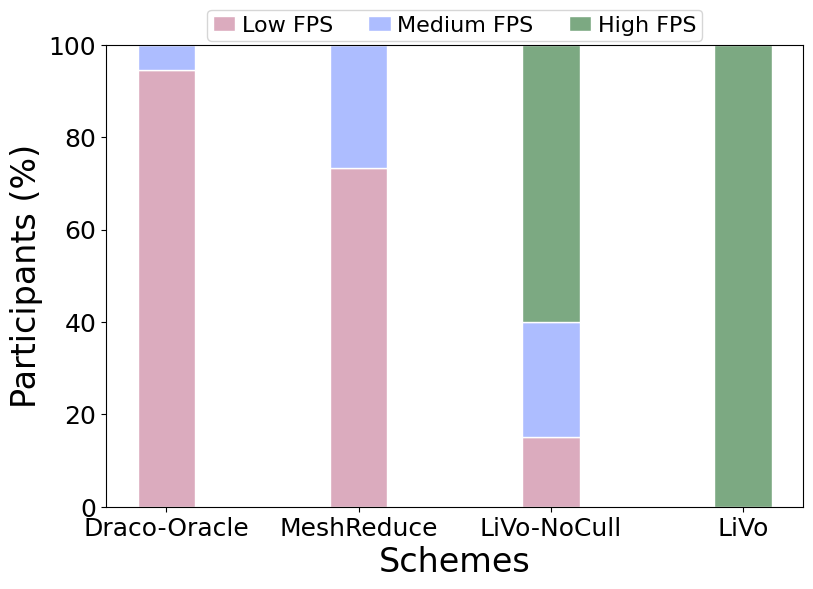

In [107]:
colors = ["#DBABBE", "#ADBDFF", "#7CA982"]

draco_data = {"low_fps": 94.44, "medium_fps": 5.56, "high_fps": 0.0}

livo_nocull_data = {"low_fps": 15.0, "medium_fps": 25.0, "high_fps": 60.0}

livo_data = {"low_fps": 0.0, "medium_fps": 0.0, "high_fps": 100.0}

meshreduce_data = {"low_fps": 73.33, "medium_fps": 26.67, "high_fps": 0.0}

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=figsize)

barWidth = 0.3

# 1) Define bar positions for the 4 methods
r = np.arange(4)

# 2) Plot the stacked bars (same as you do now)
plt.bar(
    r,
    [
        draco_data["low_fps"],
        meshreduce_data["low_fps"],
        livo_nocull_data["low_fps"],
        livo_data["low_fps"],
    ],
    color=colors[0],
    edgecolor="white",
    width=0.3,
    label="Low FPS",  # <-- label for legend
)

plt.bar(
    r,
    [
        draco_data["medium_fps"],
        meshreduce_data["medium_fps"],
        livo_nocull_data["medium_fps"],
        livo_data["medium_fps"],
    ],
    bottom=[
        draco_data["low_fps"],
        meshreduce_data["low_fps"],
        livo_nocull_data["low_fps"],
        livo_data["low_fps"],
    ],
    color=colors[1],
    edgecolor="white",
    width=0.3,
    label="Medium FPS",  # <-- label for legend
)

plt.bar(
    r,
    [
        draco_data["high_fps"],
        meshreduce_data["high_fps"],
        livo_nocull_data["high_fps"],
        livo_data["high_fps"],
    ],
    bottom=[
        draco_data["low_fps"] + draco_data["medium_fps"],
        meshreduce_data["low_fps"] + meshreduce_data["medium_fps"],
        livo_nocull_data["low_fps"] + livo_nocull_data["medium_fps"],
        livo_data["low_fps"] + livo_data["medium_fps"],
    ],
    color=colors[2],
    edgecolor="white",
    width=0.3,
    label="High FPS",  # <-- label for legend
)

plt.xticks(
    r, ["Draco-Oracle", "MeshReduce", "LiVo-NoCull", "LiVo"], fontsize=xytick_font
)
plt.ylim(0, 100)
plt.yticks(np.arange(0, 101, 20), fontsize=xytick_font)
plt.ylabel("Participants (%)", fontsize=xylabel_font)
plt.xlabel("Schemes", fontsize=xylabel_font)

legend = plt.legend(
    loc="upper center",
    handlelength=1,
    handletextpad=0.3,
    columnspacing=1.6,
    ncol=4,
    bbox_to_anchor=(0.5, 1.1),
    fontsize=legend_font,
    borderpad=0.25,
)

plt.show()

fig.savefig(
    os.path.join(out_plots_dir, "user_study_fps_distribution.pdf"),
    bbox_inches="tight",
)

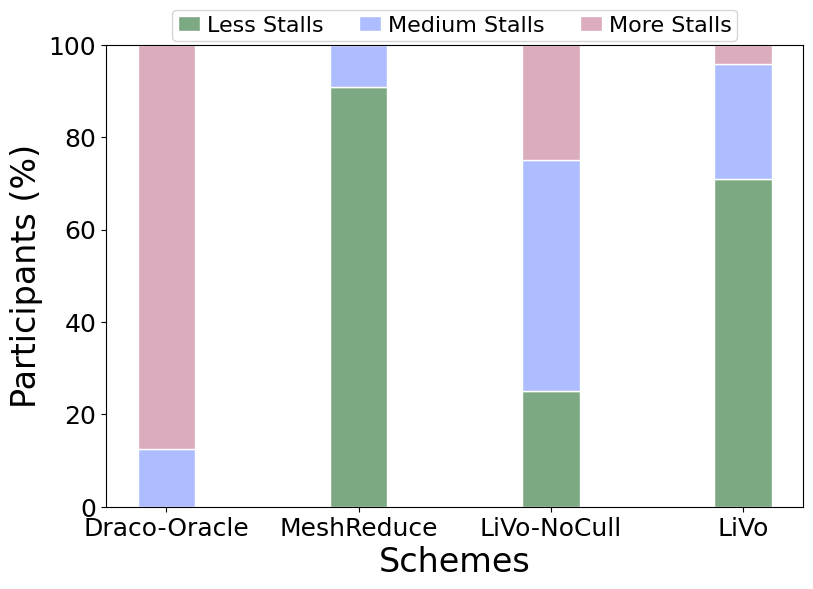

In [108]:
colors = ["#7CA982", "#ADBDFF", "#DBABBE"]

draco_data = {"less_stalls": 0.0, "medium_stalls": 12.5, "more_stalls": 87.5}

livo_nocull_data = {"less_stalls": 25.0, "medium_stalls": 50.0, "more_stalls": 25.0}

livo_data = {"less_stalls": 70.83, "medium_stalls": 25.0, "more_stalls": 4.17}

meshreduce_data = {"less_stalls": 90.9, "medium_stalls": 9.1, "more_stalls": 0.0}

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=figsize)

barWidth = 0.3
r = np.arange(4)

plt.bar(
    r,
    [
        draco_data["less_stalls"],
        meshreduce_data["less_stalls"],
        livo_nocull_data["less_stalls"],
        livo_data["less_stalls"],
    ],
    color=colors[0],
    edgecolor="white",
    width=barWidth,
    label="Less Stalls",
)
plt.bar(
    r,
    [
        draco_data["medium_stalls"],
        meshreduce_data["medium_stalls"],
        livo_nocull_data["medium_stalls"],
        livo_data["medium_stalls"],
    ],
    bottom=[
        draco_data["less_stalls"],
        meshreduce_data["less_stalls"],
        livo_nocull_data["less_stalls"],
        livo_data["less_stalls"],
    ],
    color=colors[1],
    edgecolor="white",
    width=barWidth,
    label="Medium Stalls",
)
plt.bar(
    r,
    [
        draco_data["more_stalls"],
        meshreduce_data["more_stalls"],
        livo_nocull_data["more_stalls"],
        livo_data["more_stalls"],
    ],
    bottom=[
        draco_data["less_stalls"] + draco_data["medium_stalls"],
        meshreduce_data["less_stalls"] + meshreduce_data["medium_stalls"],
        livo_nocull_data["less_stalls"] + livo_nocull_data["medium_stalls"],
        livo_data["less_stalls"] + livo_data["medium_stalls"],
    ],
    color=colors[2],
    edgecolor="white",
    width=barWidth,
    label="More Stalls",
)

plt.xticks(
    r, ["Draco-Oracle", "MeshReduce", "LiVo-NoCull", "LiVo"], fontsize=xytick_font
)
plt.ylim(0, 100)
plt.yticks(np.arange(0, 101, 20), fontsize=xytick_font)
plt.ylabel("Participants (%)", fontsize=xylabel_font)
plt.xlabel("Schemes", fontsize=xylabel_font)

legend = plt.legend(
    loc="upper center",
    handlelength=1,
    handletextpad=0.3,
    columnspacing=1.6,
    ncol=4,
    bbox_to_anchor=(0.5, 1.1),
    fontsize=legend_font,
    borderpad=0.25,
)
plt.show()

# Save figure to pdf
fig.savefig(
    os.path.join(out_plots_dir, "user_study_stall_distribution.pdf"),
    bbox_inches="tight",
)

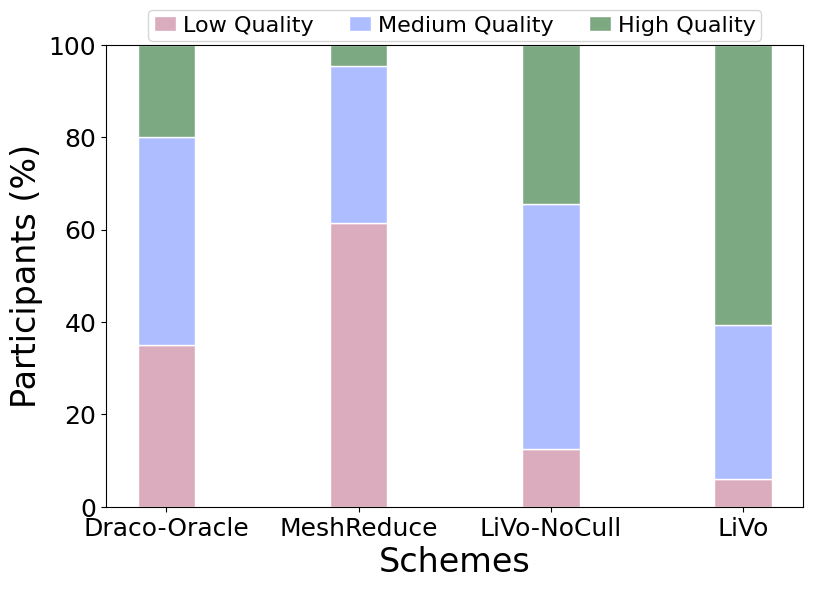

In [109]:
colors = ["#DBABBE", "#ADBDFF", "#7CA982"]

draco_data = {"low_quality": 35.0, "medium_quality": 45.0, "high_quality": 20.0}

livo_nocull_data = {"low_quality": 12.5, "medium_quality": 53.13, "high_quality": 34.37}

livo_data = {"low_quality": 6.06, "medium_quality": 33.33, "high_quality": 60.61}

meshreduce_data = {"low_quality": 61.36, "medium_quality": 34.09, "high_quality": 4.55}

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=figsize)

barWidth = 0.3
r = np.arange(4)

plt.bar(
    r,
    [
        draco_data["low_quality"],
        meshreduce_data["low_quality"],
        livo_nocull_data["low_quality"],
        livo_data["low_quality"],
    ],
    color=colors[0],
    edgecolor="white",
    width=barWidth,
    label="Low Quality",
)
plt.bar(
    r,
    [
        draco_data["medium_quality"],
        meshreduce_data["medium_quality"],
        livo_nocull_data["medium_quality"],
        livo_data["medium_quality"],
    ],
    bottom=[
        draco_data["low_quality"],
        meshreduce_data["low_quality"],
        livo_nocull_data["low_quality"],
        livo_data["low_quality"],
    ],
    color=colors[1],
    edgecolor="white",
    width=barWidth,
    label="Medium Quality",
)
plt.bar(
    r,
    [
        draco_data["high_quality"],
        meshreduce_data["high_quality"],
        livo_nocull_data["high_quality"],
        livo_data["high_quality"],
    ],
    bottom=[
        draco_data["low_quality"] + draco_data["medium_quality"],
        meshreduce_data["low_quality"] + meshreduce_data["medium_quality"],
        livo_nocull_data["low_quality"] + livo_nocull_data["medium_quality"],
        livo_data["low_quality"] + livo_data["medium_quality"],
    ],
    color=colors[2],
    edgecolor="white",
    width=barWidth,
    label="High Quality",
)

plt.xticks(
    r, ["Draco-Oracle", "MeshReduce", "LiVo-NoCull", "LiVo"], fontsize=xytick_font
)
plt.ylim(0, 100)
plt.yticks(np.arange(0, 101, 20), fontsize=xytick_font)
plt.ylabel("Participants (%)", fontsize=xylabel_font)
plt.xlabel("Schemes", fontsize=xylabel_font)

legend = plt.legend(
    loc="upper center",
    handlelength=1,
    handletextpad=0.3,
    columnspacing=1.6,
    ncol=4,
    bbox_to_anchor=(0.5, 1.1),
    fontsize=legend_font,
    borderpad=0.25,
)
plt.show()

# Save figure to pdf

fig.savefig(
    os.path.join(out_plots_dir, "user_study_quality_distribution.pdf"),
    bbox_inches="tight",
)